### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%204-%20ARIMA/Module4-AR(1)-MA(1)-intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 4: ARIMA models (intuition)

In this module, we cover the basics of ARIMA (AutoRegressive Integrated Moving Average) models, a commonly used statistical method for time series forecasting. Our focus will be on understanding the underlying concepts and components of ARIMA models, as well as how to implement them in practice.

Let's start by simple AR(1) and MA(1) models to get the intuition behind the ARIMA!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

let's write down an AR(1) process:

$y_t= c+ \phi y_{t-1} + \epsilon_t$ 


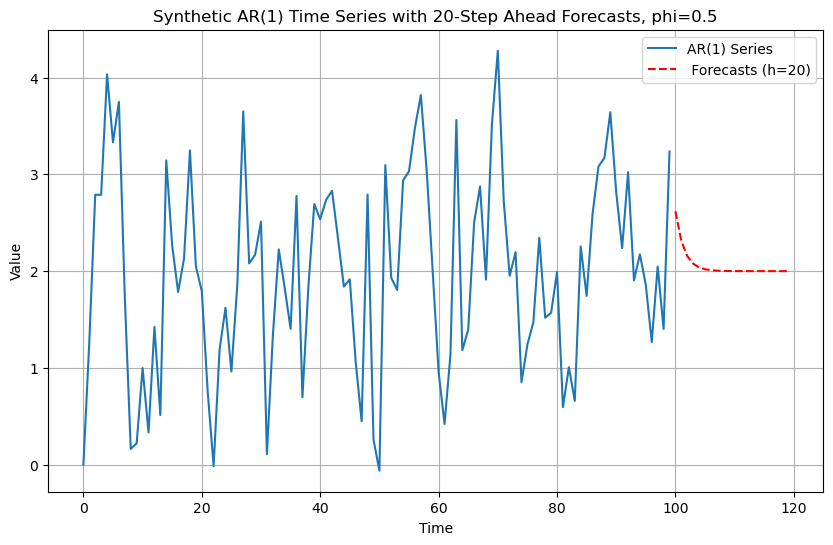

In [9]:
# Set the seed for reproducibility

# Parameters for the AR(1) model
phi = 0.5  # Coefficient for the AR(1) term
c = 1 # Constant term
sigma = 1  # Standard deviation of the noise term

# Number of observations
n = 100

# Generate the synthetic AR(1) series
y = np.zeros(n)
epsilon = np.random.normal(0, sigma, n)  # Noise term

for t in range(1, n):
    y[t] = c + phi * y[t-1] + epsilon[t]

# Forecast horizon
h = 20

current_value = y[-1]  # Last observed value from the synthetic AR(1) series
# Calculate the correct forecasts for h=10 steps ahead
forecasts = np.zeros(h)
for step in range(1, h + 1):
    forecast = c * (1 - phi**step) / (1 - phi) + phi**step * current_value
    forecasts[step - 1] = forecast

# Plot the original AR(1) series and the corrected forecasts
plt.figure(figsize=(10, 6))
plt.plot(y, label='AR(1) Series')
plt.plot(np.arange(n, n + h), forecasts, 'r--', label=f' Forecasts (h={h})')
plt.title(f'Synthetic AR(1) Time Series with {h}-Step Ahead Forecasts, phi={phi}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#forecasts



let's write down an MA(1) process:

$y_t= c+ \theta \epsilon_{t-1} + \epsilon_t$ 


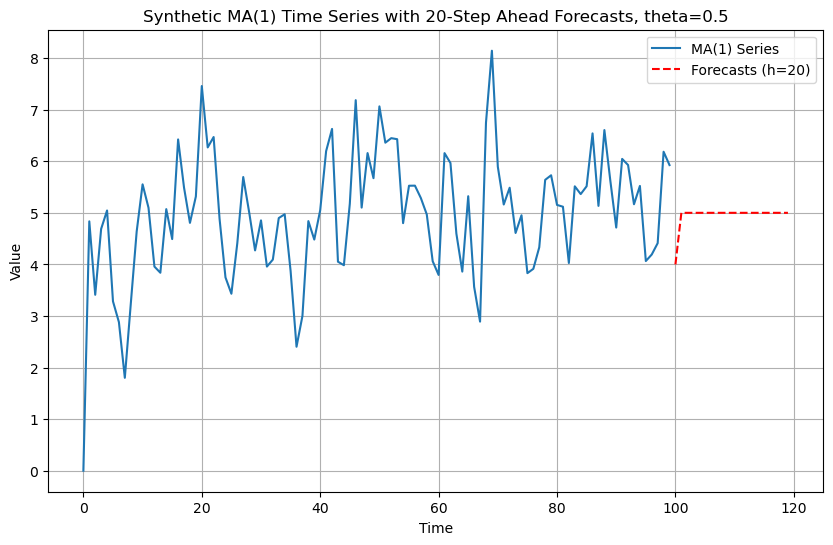

In [29]:
# Parameters for the MA(1) model
theta = 0.5 # Coefficient for the MA(1) term
mu = 5  # Mean of the series
sigma = 1  # Standard deviation of the noise term

# Generate the synthetic MA(1) series
epsilon_ma = np.random.normal(0, sigma, n + 1)  # +1 to include epsilon[-1] in the loop
y_ma = np.zeros(n)

for t in range(1, n):
    y_ma[t] = mu + theta * epsilon_ma[t-1] + epsilon_ma[t]

# Forecasting for MA(1) model
# For MA(1), the forecast beyond 1 step ahead is just the mean of the series
forecasts_ma = np.full(h, mu)  # All forecasts are the mean for h > 1
# adding the first prediction
forecasts_ma[0] = mu + theta * epsilon_ma[-1]

# Plot the MA(1) series and forecasts
plt.figure(figsize=(10, 6))
plt.plot(y_ma, label='MA(1) Series')
plt.plot(np.arange(n, n + h), forecasts_ma, 'r--', label=f'Forecasts (h={h})')
plt.title(f'Synthetic MA(1) Time Series with {h}-Step Ahead Forecasts, theta={theta}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#forecasts_ma
